In [37]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

sns.set()

df = pd.read_csv("2019_nCoV_data.csv", header = 0)
df = df.drop(["Sno", "Last Update"], axis=1)
df.head(10)

,Date,Province/State,Country,Confirmed,Deaths,Recovered
0,01/22/2020 12:00:00,Anhui,China,1.0,0.0,0.0
1,01/22/2020 12:00:00,Beijing,China,14.0,0.0,0.0
2,01/22/2020 12:00:00,Chongqing,China,6.0,0.0,0.0
3,01/22/2020 12:00:00,Fujian,China,1.0,0.0,0.0
4,01/22/2020 12:00:00,Gansu,China,0.0,0.0,0.0
5,01/22/2020 12:00:00,Guangdong,China,26.0,0.0,0.0
6,01/22/2020 12:00:00,Guangxi,China,2.0,0.0,0.0
7,01/22/2020 12:00:00,Guizhou,China,1.0,0.0,0.0
8,01/22/2020 12:00:00,Hainan,China,4.0,0.0,0.0
9,01/22/2020 12:00:00,Hebei,China,1.0,0.0,0.0


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1719 entries, 0 to 1718
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1719 non-null   object 
 1   Province/State  1257 non-null   object 
 2   Country         1719 non-null   object 
 3   Confirmed       1719 non-null   float64
 4   Deaths          1719 non-null   float64
 5   Recovered       1719 non-null   float64
dtypes: float64(3), object(3)
memory usage: 80.7+ KB


In [ ]:
df.describe()

In [99]:
# Check sum of duplicates by specified columns. Should be 0 if no duplicates
sum(df.duplicated(['Country', 'Province/State', 'Date']))

0

In [100]:
df["Country"].value_counts()

Mainland China          801
US                      188
Australia                84
Canada                   59
China                    34
Japan                    27
Thailand                 27
South Korea              27
Hong Kong                26
Macau                    26
Vietnam                  26
Taiwan                   26
Singapore                26
Malaysia                 25
France                   25
Nepal                    24
Germany                  22
Sri Lanka                22
Cambodia                 22
Finland                  20
Philippines              20
United Arab Emirates     20
India                    19
Italy                    19
UK                       18
Russia                   18
Spain                    18
Sweden                   18
Belgium                  14
Others                   11
Egypt                     4
Brazil                    1
Ivory Coast               1
Mexico                    1
Name: Country, dtype: int64

In [38]:
# Find specific value in Country column and replace with other value
df.loc[df["Country"]=="Mainland China", "Country"] = "China"

In [3]:
df['Country'].unique()

array(['China', 'US', 'Japan', 'Thailand', 'South Korea', 'Hong Kong',
       'Macau', 'Taiwan', 'Singapore', 'Philippines', 'Malaysia',
       'Vietnam', 'Australia', 'Mexico', 'Brazil', 'France', 'Nepal',
       'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast', 'Germany',
       'Finland', 'United Arab Emirates', 'India', 'Italy', 'Sweden',
       'Russia', 'Spain', 'UK', 'Belgium', 'Others', 'Egypt'],
      dtype=object)

In [44]:
# Convert string date representation to date object
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].apply(lambda x:x.date())

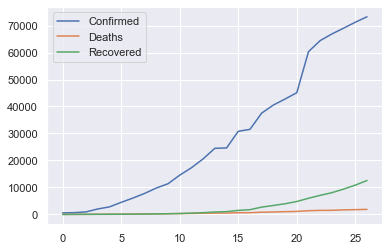

In [45]:
# Group by date and find sum
df_by_date=df.groupby(['Date']).sum().reset_index(drop=None)
df_by_date.plot()

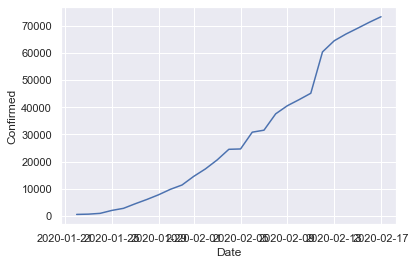

In [46]:
sns.lineplot(x=df_by_date["Date"],
           y=df_by_date["Confirmed"],
           data=df_by_date)
